In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import os
import numpy as np

In [2]:
inlier_path = os.path.join('data_v2\Real')
outlier_path_f = os.path.join('data_v2\Distorted')

inlier = [os.path.join(inlier_path, fname) for fname in os.listdir(inlier_path)]
outlier_f = [os.path.join(outlier_path_f, fname) for fname in os.listdir(outlier_path_f)]

num_of_file = len(os.listdir(inlier_path))
num_of_file

6000

In [3]:
outlier_path_p = os.path.join('data_v2\pattern')
outlier_p = []
for d in os.listdir(outlier_path_p):
    nested_d = os.path.join(outlier_path_p, d)
    pattern = [os.path.join(nested_d, fname) for fname in os.listdir(nested_d)]
    outlier_p += pattern
len(outlier_p)

400

In [4]:
import random
outlier = outlier_f + outlier_p
random.shuffle(outlier)
outlier = outlier[:int(len(inlier)/0.98*0.02)]
len(outlier)

122

In [5]:
samples = np.array(inlier + outlier)
labels = np.array([0 for i in range(num_of_file)] + [1 for i in range(len(outlier))])
len(samples)

6122

In [6]:
sum(labels)

122

In [7]:
indices = np.arange(samples.shape[0])
np.random.shuffle(indices)

samples = samples[indices]
labels = labels[indices]

s_index = int(len(samples)*0.8)

X_train_path = samples[:s_index]
y_train = labels[:s_index]
X_test_path = samples[s_index:]
y_test = labels[s_index:]

In [8]:
len(X_train_path)

4897

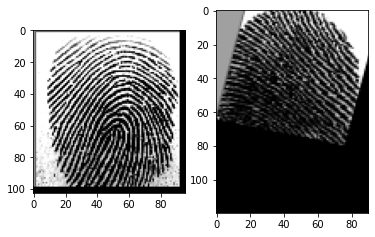

In [9]:
fig,ax = plt.subplots(1,2)
ax[0].imshow(image.load_img(inlier[0]),cmap="gray")
ax[1].imshow(image.load_img(outlier[0]),cmap="gray")
plt.show()

In [10]:
def pipeline(img_path):
    img = image.load_img(img_path,target_size = (60,45),color_mode = "grayscale")
    img = image.img_to_array(img)
    return img.flatten()

In [11]:
X_train = []
X_test = []
for path in X_train_path:
    img = pipeline(path)
    X_train.append(img)
for path in X_test_path:
    img = pipeline(path)
    X_test.append(img)

In [12]:
# X_train = []
# X_test = []
# Y_train = []
# Y_test = []
# for i in range(128):
#     img = image.load_img(inlier[i],target_size = (60,45),color_mode = "grayscale")
#     img = image.img_to_array(img)
    
#     #img = img.reshape((1,)+img.shape)
#     img = img.flatten()
#     if i < 100:        
#         X_train.append(img)
#         Y_train.append(0)
#     else:
#         X_test.append(img)
#         Y_test.append(0)
# for i in range(128):
#     img = image.load_img(outlier[i],target_size = (60,45),color_mode = "grayscale")
#     img = image.img_to_array(img)
#     #img = img.reshape((1,)+img.shape)
#     img = img.flatten()
#     if i < 28:
#         X_train.append(img)
#         Y_train.append(1)
#     else:
#         X_test.append(img)
#         Y_test.append(1)

In [13]:
X_train = np.vstack(X_train)
X_test = np.vstack(X_test)
y_train = np.vstack(y_train)
y_test = np.vstack(y_test)

In [14]:
X_train.shape

(4897, 2700)

In [21]:
from pyod.models.copod import COPOD
clf = COPOD(contamination = 0.02)

In [22]:
clf.fit(X_train)

COPOD(contamination=0.02, n_jobs=1)

In [23]:
from joblib import dump

# save the model
dump(clf, 'model_v2.joblib')

['model_v2.joblib']

In [24]:
from joblib import load
#load the model
clf1 = load('model_v2.joblib')

from pyod.utils.data import evaluate_print
from pyod.utils.example import visualize

clf_name = "COPOD"

y_train_pred = clf.labels_  # binary labels (0: inliers, 1: outliers)
y_train_scores = clf.decision_scores_  # raw outlier scores

# get the prediction on the test data
y_test_pred = clf.predict(X_test)  # outlier labels (0 or 1)
y_test_scores = clf.decision_function(X_test)  # outlier scores

# evaluate and print the results
print("\nOn Training Data:")
evaluate_print(clf_name, y_train, y_train_scores)
print("\nOn Test Data:")
evaluate_print(clf_name, y_test, y_test_scores)

# visualize the results
# visualize("COPOD", X_train, Y_train, X_test, Y_test, y_train_pred,
#           y_test_pred, show_figure=True, save_figure=False)


On Training Data:
COPOD ROC:0.9999, precision @ rank n:0.9697

On Test Data:
COPOD ROC:0.9999, precision @ rank n:0.9565


outlier


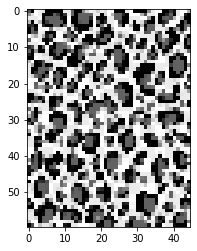

In [19]:
img = image.load_img("other_outlier\\baowen.png", target_size = (60,45), color_mode = "grayscale")
plt.figure
plt.imshow(img,cmap = 'gray')
x = image.img_to_array(img).flatten()
x = np.vstack(x).T
y = clf.predict(x)
if y[0] == 1:
    print("outlier")
else:
    print("inlier")
# label 1 for outlier

In [ ]:
img = image.load_img("other_outlier\\mangshe.jpg", target_size = (60,45), color_mode = "grayscale")
plt.figure
plt.imshow(img,cmap = 'gray')
x = image.img_to_array(img).flatten()
x = np.vstack(x).T
y = clf.predict(x)
if y[0] == 1:
    print("outlier")
else:
    print("inlier")
# label 1 for outlier

In [ ]:
img = image.load_img("other_outlier\\baowen2.png", target_size = (60,45), color_mode = "grayscale")
plt.figure
plt.imshow(img,cmap = 'gray')
x = image.img_to_array(img).flatten()
x = np.vstack(x).T
y = clf.predict(x)
if y[0] == 1:
    print("outlier")
else:
    print("inlier")
# label 1 for outlier

outlier


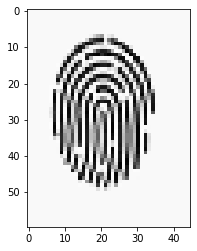

In [30]:
img = image.load_img("other_outlier\\zhiwen1.png", target_size = (60,45), color_mode = "grayscale")
plt.figure
plt.imshow(img,cmap = 'gray')
x = image.img_to_array(img).flatten()
x = np.vstack(x).T
y = clf.predict(x)
if y[0] == 1:
    print("outlier")
else:
    print("inlier")
# label 1 for outlier

In [ ]:
img = image.load_img("other_outlier\\zhiwen2.png", target_size = (60,45), color_mode = "grayscale")
plt.figure
plt.imshow(img,cmap = 'gray')
x = image.img_to_array(img).flatten()
x = np.vstack(x).T
y = clf.predict(x)
y
# label 1 for outlier

In [ ]:
img = image.load_img("other_outlier\\baowen2.png", target_size = (60,45), color_mode = "grayscale")
plt.figure
plt.imshow(img,cmap = 'gray')
x = image.img_to_array(img).flatten()
x = np.vstack(x).T
y = clf.predict(x)
if y[0] == 1:
    print("outlier")
else:
    print("inlier")
# label 1 for outlier

In [ ]:
img = image.load_img("other_outlier\\floral1.png", target_size = (60,45), color_mode = "grayscale")
plt.figure
plt.imshow(img,cmap = 'gray')
x = image.img_to_array(img).flatten()
x = np.vstack(x).T
y = clf.predict(x)
if y[0] == 1:
    print("outlier")
else:
    print("inlier")

In [ ]:
img = image.load_img("other_outlier\\zigzagged1.png", target_size = (60,45), color_mode = "grayscale")
plt.figure
plt.imshow(img,cmap = 'gray')
x = image.img_to_array(img).flatten()
x = np.vstack(x).T
y = clf.predict(x)
if y[0] == 1:
    print("outlier")
else:
    print("inlier")

In [25]:
more_test = [os.path.join('fingerprint\\nonfingerprint', fname) for fname in os.listdir('fingerprint\\nonfingerprint')]
result = []
X = []
for i in more_test:
    x = pipeline(i)
    X.append(x)
X = np.vstack(X)
y = clf.predict(X)
#y = clf.decision_function(X)
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [26]:
sum(y)/len(y)

1.0

In [24]:
more_test = [os.path.join('fingerprint\\outliers', fname) for fname in os.listdir('fingerprint\\outliers')]
result = []
X = []
for i in more_test:
    x = pipeline(i)
    X.append(x)
X = np.vstack(X)
y = clf.predict(X)
#y = clf.decision_function(X)
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [27]:
sum(y)/len(y)

1.0

In [26]:
more_test = [os.path.join('fingerprint\\inliers', fname) for fname in os.listdir('fingerprint\\inliers')]
result = []
X = []
for i in more_test:
    x = pipeline(i)
    X.append(x)
X = np.vstack(X)
y = clf.predict(X)
#y = clf.decision_function(X)
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [35]:
sum(y)

85

In [ ]:
y_train

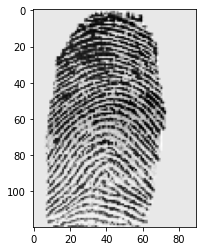

In [33]:
img = image.load_img(more_test[18], target_size = (120,90), color_mode = "grayscale")
plt.figure
plt.imshow(img,cmap = 'gray')